In [97]:
# Import the necessary libraries
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

In [98]:
# Import dataset using Pandas and set ID as index
df = pd.read_csv('QSR professional DATA.csv', index_col='ID')
# Print the first 5 rows of the dataset using Pandas
df.head()


,Zip code,Gender,Marital,academic,Professional,Age,num/week,num/month,favorite QSR,num-people,...,Variety,value,location,drive -tru,discounts,healthy food,menu,last visit,visit again,recommend
ID,,,,,,,,,,,,,,,,,,,,,
1,72801,1,1,6,Scammer,5,NaN,2.0,Quizno's,2,...,5,4,4,3,4,4,4,5,5,5
2,72857,2,1,6,staff,3,2.0,8.0,Wendy's,2,...,4,4,4,4,2,4,4,4,4,4
3,72837,1,3,6,Photography,5,3.0,10.0,Wendy's,5,...,5,4,3,4,3,2,3,5,4,5
4,72811,2,1,6,OT,2,2.0,8.0,Steak N Shake,6,...,3,3,3,2,3,3,3,3,4,3
5,72834,1,3,6,retired,6,7.0,27.0,Subway,1,...,4,4,3,1,3,4,4,3,4,4


In [99]:
# loop through the columns and if a column has an int or float, then add fill it's NaN values with 0
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col] = df[col].fillna(0)

#### Feature Engineering
- Make a function to calculate the sum of all of the scores for each row from column name 'appealing' to 'visit again' 
- and store it into a new column called 'total score'

In [100]:
# Make the function here
def calculate_total_score(df, start_col_name, end_col_name, new_col_name):
    df[new_col_name] = df.loc[:, start_col_name:end_col_name].sum(axis=1)
    return df

# Implement the function here
df = calculate_total_score(df, 'appealing', 'visit again', 'Total Score')

#### Exploritory Data Analysis
- Use MatPlotLib and Seaborn to create visualizations of the data using the questions in each cell

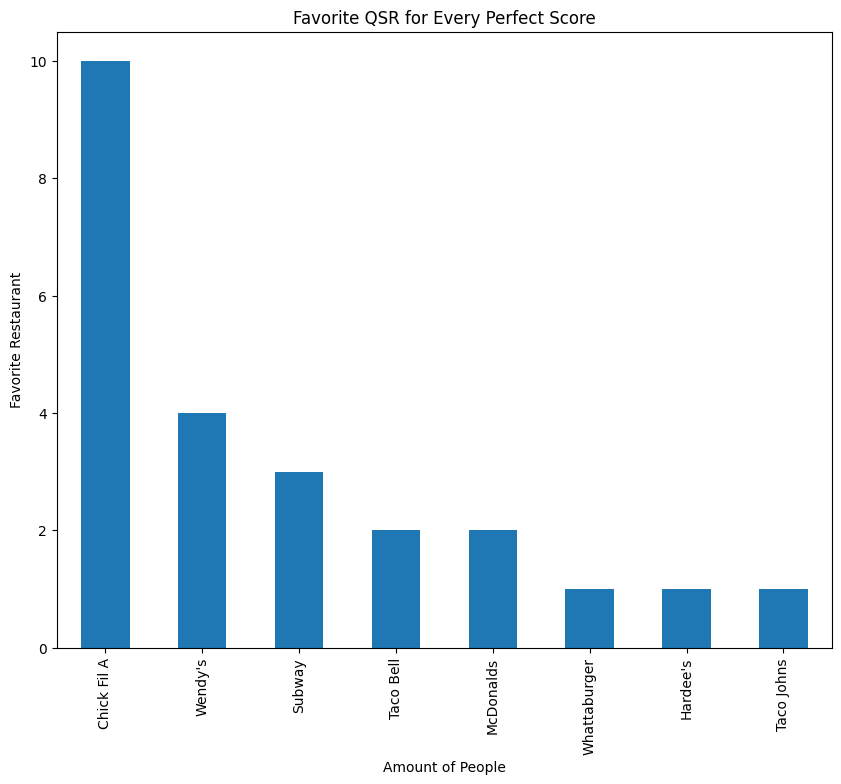

In [101]:
# Make a bar graph of the restaurants with the most perfect score and how many perfect scores they have with Matplotlib
df.loc[df['Total Score'] == 125]['favorite QSR'].value_counts().plot(kind='bar', figsize=(10,8))
plt.title('Favorite QSR for Every Perfect Score')
plt.xlabel('Amount of People')
plt.ylabel('Favorite Restaurant')
plt.show()

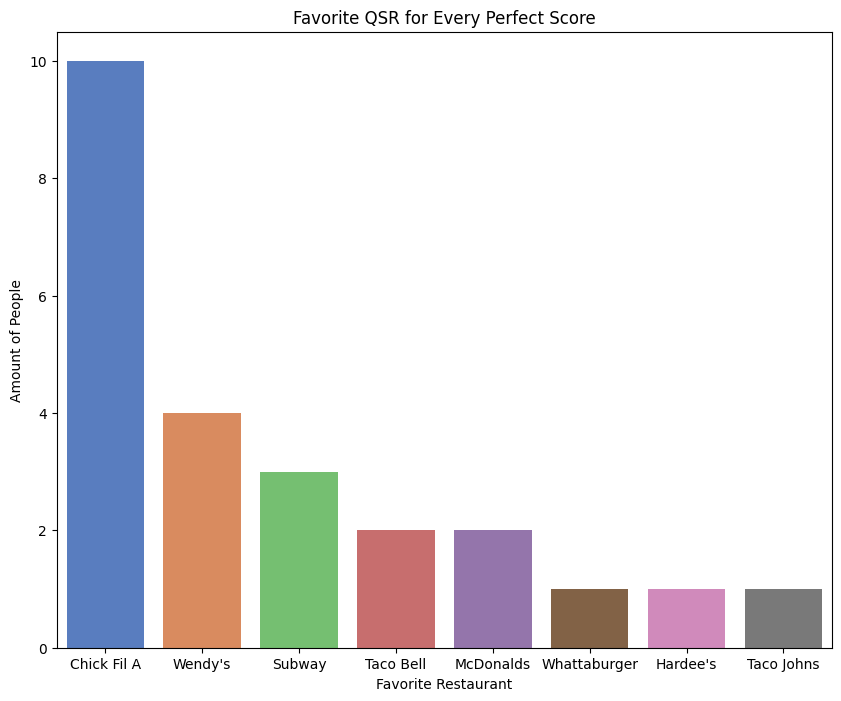

In [102]:
# Make the same plot using Seaborn just for Practice :-)

total_score_125 = df.loc[df['Total Score'] == 125]
plt.figure(figsize=(10, 8))
sns.barplot(x=total_score_125['favorite QSR'].value_counts().index,
            y=total_score_125['favorite QSR'].value_counts().values,
            palette='muted')
plt.title('Favorite QSR for Every Perfect Score')
plt.xlabel('Favorite Restaurant')
plt.ylabel('Amount of People')
plt.show()

Text(0, 0.5, 'Average Recommend Rating')

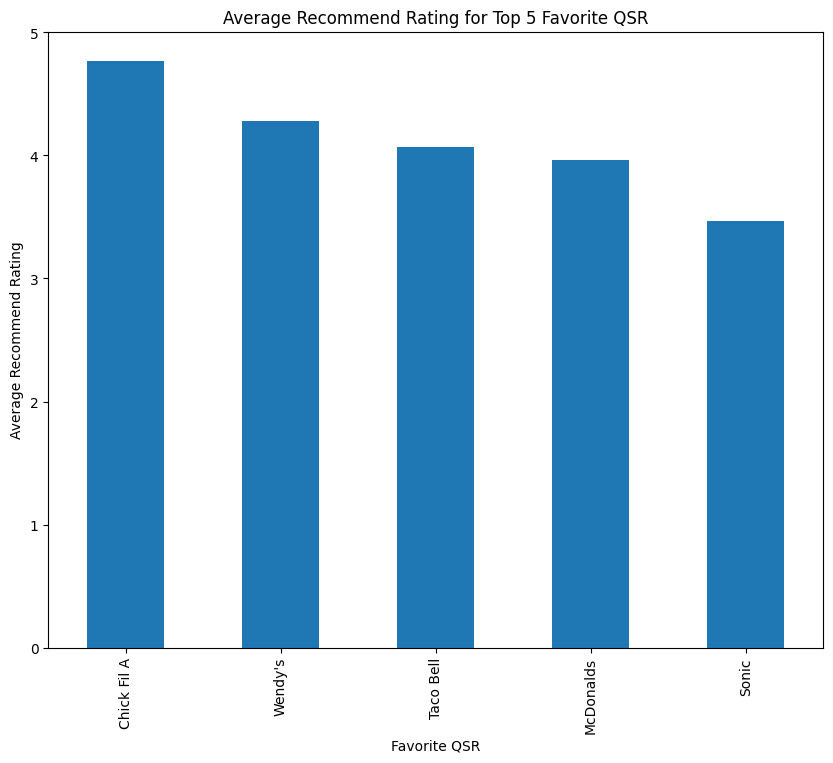

In [103]:
# get the top 5 most picked restaurants from favorite QSR and their average rating for recommend
top_5 = df['favorite QSR'].value_counts().head(5)
top_5_df = df[df['favorite QSR'].isin(top_5.index)]
top_5_df.groupby('favorite QSR')['recommend'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
plt.title('Average Recommend Rating for Top 5 Favorite QSR')
plt.xlabel('Favorite QSR')
plt.ylabel('Average Recommend Rating')


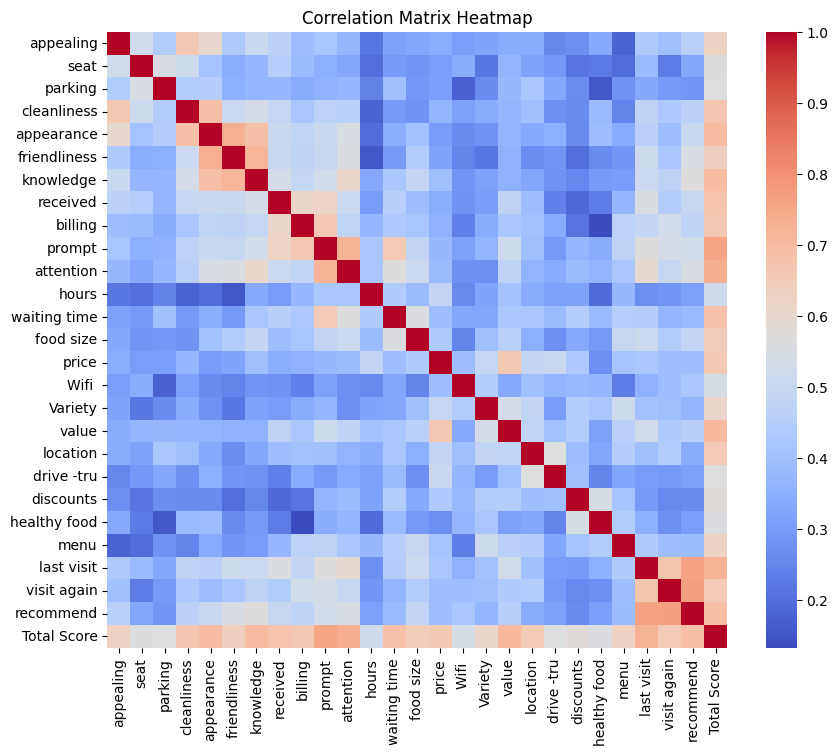

In [104]:
# Make a correlation matrix heatmap of the dataset only using the features that score the restaurant on a scale of 1-5 up to the recommend and Total Score feature you created earlier

cor_columns = ['appealing',
       'seat', 'parking', 'cleanliness', 'appearance', 'friendliness',
       'knowledge', 'received', 'billing', 'prompt', 'attention', 'hours',
       'waiting time', 'food size', 'price', 'Wifi ', 'Variety', 'value',
       'location', 'drive -tru', 'discounts', 'healthy food', 'menu',
       'last visit', 'visit again', 'recommend', 'Total Score']


numericDf = pd.DataFrame()
for col in cor_columns:
       numericDf[col] = df[col]
       matrix = numericDf.corr()

# make a heatmap of the correlation matrix that have a high correlation

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Modeling

In [105]:
# Import KMeans from Sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [106]:
# Put 'Total Score' and 'recommend' into a list called relevant_features
relevant_features = ['Total Score', 'recommend']

# Make variable X equal to the values of the relevant_features in df

# Make X equal to the values of the relevant_features in df
X = df[relevant_features].values

# Make an empty list called results
results = []

# Write a loop that runs through the range of 1-10 (which represents the amount of clusters)
# and fits the data to KMeans for each amount of cluster between 1-10 with init of "k-means++" and random state of 42.
# Finally, append the inertia_ to the results list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    results.append(kmeans.inertia_)
    
    #inertia_ is the formula used to segregate the data points into clusters

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

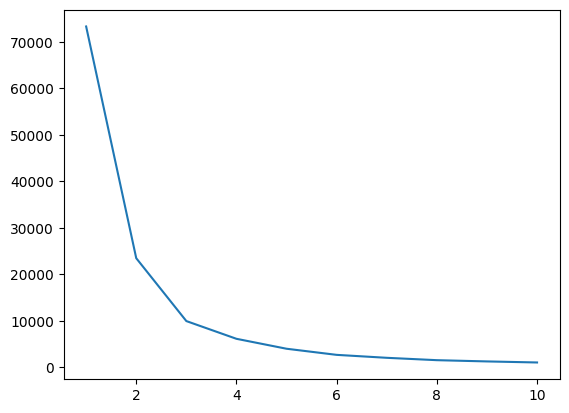

In [107]:
# Plot the results in a plot of range 1-10
plt.plot(range(1,11), results)

Notice where the elbow of the plot is and how it is the best place to choose the amount of clusters.

Model X according to the amount of clusters that the intruction above suggests.


In [108]:
# Model here

# Set model equal to KMeans with 3 clusters, init of "k-means++" and random state of 42
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=42)

# fit_predict the X into y_kmeans
y_kmeans = kmeansmodel.fit_predict(X)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Plotting the Clusters

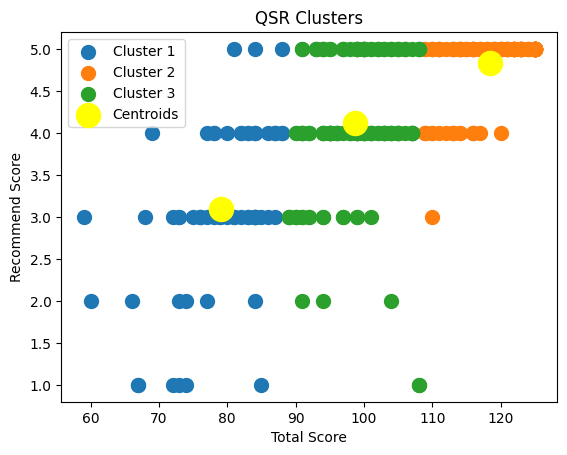

In [109]:
# Set num_clusters equal to the amount of unique values in y_kmeans
num_clusters = len(np.unique(y_kmeans))

# Make a scatter plot of the clusters using a for loop and plt.scatter
for cluster in range(num_clusters):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, label=f'Cluster {cluster+1}')

# Plot the centroids of the clusters
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Set the title of the plot
plt.title('QSR Clusters')

# Set the x and y labels
plt.xlabel('Total Score')
plt.ylabel('Recommend Score')

# Show the legend
plt.legend()

# Show the plot
plt.show()